## **Lab Activity #1: Susceptible-Infectious-Recovered (SIR) models**

Submitted by:\
IMPERIAL, Austin Gomez\
MANINANG, Enika Aubrey\
VILLADAREZ, Luis Gabriel\
YAPAN, Miguel Carlo

Date: 03-01-22

In [1]:
#import pertinent libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

## **Problem 1**.
Suppose that, in a city of approximately three million, five people who have just become infectious have recently entered the city carrying a certain disease. Each of those individuals have one contact each day that could spread the disease, and an average of three days is spent in the infectious state. Find the solution of the corresponding SIR equations using solve_ivp for fifty days, where each time period is half a day, and plot your results. Use the percentages of each state, not the actual number
of people in the state.

At the peak of the infection, how many in the city will still be able to work (assume for simplicity that those who are in the infectious state either cannot go to work or are unproductive, etc.)?

Hint: Use the t-values parameter in solve_ivp to pass in an array of t-values. Also, assume that your b value is equal to 1.

Compare your plot to the figure below.

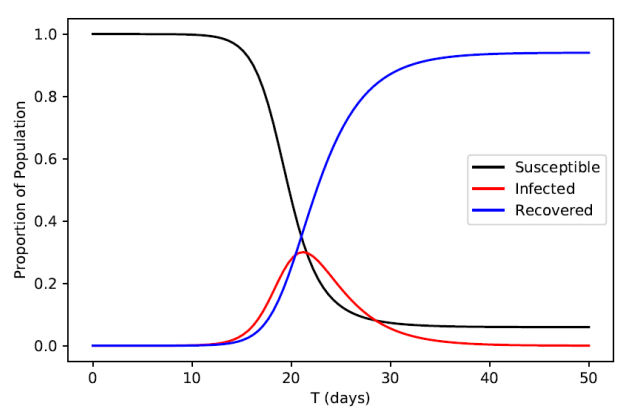

Recovered during Peak of Infection: [0.35533971]
Susceptible during Peak of Infection: [0.34405105]
There are [2098173.] workers available during the peak of the disease, which constitutes to [69.93907559] percent of the population.


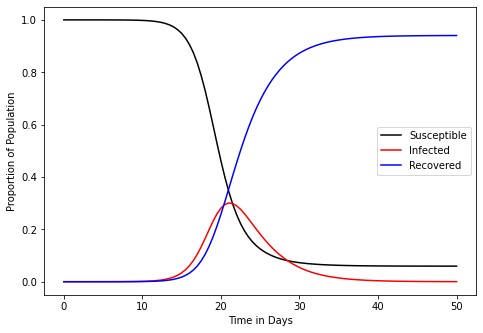

In [2]:
#We first assign values for our given variables N, k, b, a, and r

N = 3000000
k = 1
b = 1
a = 1/3
r = (k*b)/N

#We define the differential equations for our three variables S, I, and R

def function(t, y):
    S, I, R = y
    dS = -r*(S*I)
    dI = r*(S*I)-(a*I)
    dR = a*I
    return dS, dI, dR

#We assign the solution to the initial value problem to solution. 
#Since we want to predict the transmission for 50 days, we set the t_span parameter from 0 to 50 days.
#We pass (2999995, 5, 0) for the y0 parameter to indicate the initial values of S, I, and R, respectively.
#Do note that we take 2999995 as the initial value for S because the 5 infected people is included in the city, as the question states.
#Since we want to take a period of half a day, we divide the times by 50*2=100+1 periods, the +1 refers to the 0 period.

t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 101)
y0 = (2999995, 5, 0)

solution = solve_ivp(function, t_span, y0, t_eval = t_eval)

#To find the percentage of population that are susceptible, infected, and recovered, we divide each of the three entries in our solution.y by N and assign them to their respective variables
#We also assign t as the array of time periods from solution.t

susceptible = solution.y[0]/N
infected = solution.y[1]/N
recovered = solution.y[2]/N
t = solution.t

#The following lines of code plots the model.

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(t, susceptible, 'black',  label = 'Susceptible')
ax.plot(t, infected, 'red', label = 'Infected')
ax.plot(t, recovered, 'blue', label = 'Recovered')
ax.set_xlabel('Time in Days')
ax.set_ylabel('Proportion of Population')
ax.legend()

#To know how much of the population is working when the infected is at its peak, we match the index of the maximum infecteds with that of the susceptibles and recovereds.

peak_infected_index = np.where(infected == infected.max())
peak_recovered = recovered[peak_infected_index]
peak_susceptible = susceptible[peak_infected_index]
peak_workers_number = np.ceil((peak_recovered*N) + (peak_susceptible*N))
peak_workers_percent = (peak_recovered*100)+(peak_susceptible*100)

print("Recovered during Peak of Infection:", peak_recovered)
print("Susceptible during Peak of Infection:", peak_susceptible)
print("There are", peak_workers_number, "workers available during the peak of the disease, which constitutes to", peak_workers_percent, "percent of the population.")

#Assuming that susceptibles and recovereds can work, around 70 percent of the population can work at the peak of the infected cases.
#This also means that around 30 percent of the population will be sick at the peak.

## **Problem 2**.

On March 11, 2020, New York City had 52 confirmed cases of Covid-19. On that day New York started its lockdown measures. Using the following information, model what the spread of the virus could have been, using solve_ivp, if New York did not implement any measures to curb the spread of the virus over the next 150 days:

> there are approximately 8.399 million people in New York city,

> the average case of Covid-19 lasts for 10 days,

> and each infected person can spread the virus to 2.5 people.

> Also, assume your b value is equal to 0.1.

Plot your results for each day.

>>1) At the projected peak, how many concurrent active cases are there?

>>2) Assuming that about 5% of Covid-19 cases require hospitalization, and using the fact that there are about 58,000 hospital beds in NYC, how many beds over capacity will the hospitals in NYC be at the projected peak?

Active Cases during Peak of Infection: [1961892.]
Beds over Capacity: [40095.]


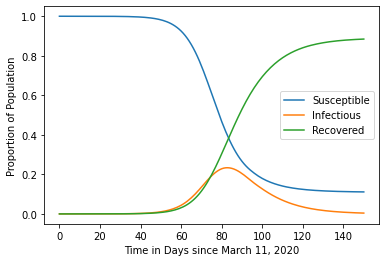

In [3]:
#We set the variables of our given. I0, R0, S0 refer to the initial susceptible, infected, and recovered values, respectively.

N = 8399000
I0 = 52
R0 = 0
S0 = N - R0 - I0
k = 2.5

a = 1/10
b = 0.1

r = k * b/N
t = np.linspace(0, 150, 151)

#The following lines define our differential equations.

def function(t, y):
    S, I, R = y
    dSdt = -r * S * I
    dIdt = (r * S * I) - (a * I)
    dRdt = a * I
    return dSdt, dIdt, dRdt

y0 = [S0, I0, R0]

sol = solve_ivp(function, [t[0], t[-1]], y0, t_eval=t)

#The following lines of code plot the solution to our equations.

plt.plot(sol.t, (sol.y[0])/N, label='Susceptible')
plt.plot(sol.t, (sol.y[1])/N, label='Infectious')
plt.plot(sol.t, (sol.y[2])/N, label='Recovered')

plt.legend()
plt.xlabel('Time in Days since March 11, 2020')
plt.ylabel('Proportion of Population')

#To know the number of concurrent active cases during peak, we match the index of the maximum number of infecteds.

infected = sol.y[1]/N

peak_infected_index = np.where(infected == infected.max())
num_infected = infected[peak_infected_index] * N

#We use the ceiling to consider the decimals appropriately in the context of a population.

print("Active Cases during Peak of Infection:", np.ceil(num_infected))

#There are 1961892 active cases during the projected peak of infection.

#To know how many beds over capacity the beds in NYC will be when the infected is at its peak, we take the number of hospitalized cases which is 5% of num_infected.

beds = 58000

hosp_infected = num_infected * 0.05
occupied_bed = np.ceil(hosp_infected) 
bed_over_cap = occupied_bed - beds

print("Beds over Capacity:", bed_over_cap)

#NYC lacks 40095 beds during the peak of infection.

## **Problem 3**.

There are 7 billion people in the world. Influenza, or the flu, is one of those viruses that everyone can be susceptible to, even after recovering. The flu virus is able to change in order to evade our immune system, and we become susceptible once more, although technically it is now a different strain. Suppose the virus originates with 1000 people in Texas after Hurricane Harvey flooded Houston, and stagnant water allowed the virus to proliferate.

According to WebMD, once you get the virus, adults are contagious up to a week and kids up to 2 weeks. For this lab, suppose you are contagious for 10 days before recovering. Also suppose that on average someone makes one contact every two days that could spread the flu. Since we can catch a new strain of the flu, suppose that a recovered individual becomes susceptible again with probability 𝑓 = 1/50. The flu is also known to be deadly, killing hundreds of thousands every year on top of the normal death rate. To assure a steady population, let the birth rate balance out the death rate, and in particular let 𝜇 = 0.0001. Lastly, assume your b value is equal to 1.

Using the SIRS model above, plot the proportion of population that is Susceptible, Infected, and Recovered over a year span (365 days).

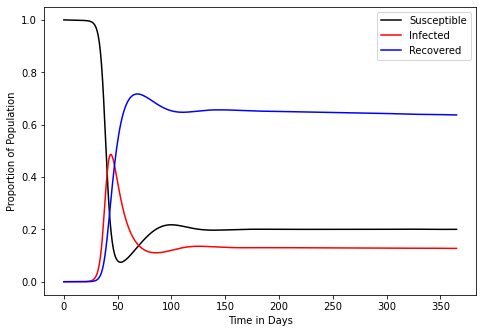

In [5]:
#Initiate values for the given variables N, k, b, a, r, f, and u as mu.

N = 7000000000
k = 1/2
b = 1
a = 1/10
r = (k*b)/N
f = 1/50
u = 0.0001

#Define the differential equation for the variables.
def function (t,y):
    S, I, R = y
    dS = (f*R) + (u*(1-S)) - (r*S*I)
    dI = (r*S*I) - ((a+u)*I)
    dR = -(f*R) + (a*I) - (u*R)
    return dS, dI, dR
    
#Since the problem requires us to model for a year, we set t_span to 365 days.
#We take the values (6999999000, 1000, 0) for the initial values of S, I, and R used in the differential equation
t_span = (0, 365)
t_eval = np.linspace(t_span[0],t_span[1],366)
y0 = (6999999000, 1000, 0)

solution = solve_ivp(function, t_span, y0, t_eval = t_eval)

#To find the percentage of population that are susceptible, infected, and recovered, 
#We divide our numbers for S, I, and R respectively by N and assign them to their respective variables to be able to graph.
#We also assign t as the array of time periods from solution.t

susceptible = solution.y[0]/N
infected = solution.y[1]/N
recovered = solution.y[2]/N
t = solution.t

#We then plot the SIRS model.

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(t, susceptible, 'black',  label = 'Susceptible')
ax.plot(t, infected, 'red', label = 'Infected')
ax.plot(t, recovered, 'blue', label = 'Recovered')
ax.set_xlabel('Time in Days')
ax.set_ylabel('Proportion of Population')
ax.legend();

In [7]:
N-1000


6999999000